2$^{\rm nd}$ computational assignment for "*Introduzione alla Fisica Statistica*" and "*Meccanica Statistica 1*" (part 2 of 2). These are the assignments for **Spring 2020** (C. Barbieri).

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Diffusion equation and random walks

During the first lectures, we have studied random walks in 1D and 2D as models for the scattering of perfume in the air. We have seen that the molecules of perfume undergo a random walk as a consequence of collisions with atoms in the air. If the walk takes place in such a way that each new step is chosen with equal probablility in all directions, then the density distribution of perfume $\rho(\vec{r},t)$ evolves in time according to the isotropic diffusion equation:

$$
\frac{\partial \rho(\vec{r},t)}{\partial t} = D \, \nabla^2 \rho(\vec{r},t) \; ,
$$

where $D$ is the diffusion constant.

In this excercise you are asked to simulate the evolution of a set of random walks in 1 dimension and to compare it with the solution of the corresponding diffusion equation.

## Particles in a box

We will assume that the parfume molecules are contained in a 1D box, so that their positions are constrained inside the interval $x_i \in [L_0,L_1]$. To begin with, we can chose these walls far enough so that they do not interfere with the paths of each walk (at least for the initial part of the time evolution). Let us first consisder an ensemble of random walks whose initial conditions are set according to a normal distribution:

$$
\rho_0(x) = \rho(x,t=0) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} \, .
$$

Create and array `xw_0` that stores the initial positions of all walks, randomly chosen according to $\rho_0(x)$. You will need a few thousands of such initial conditions. Also, create two arrays `xm_mesh` and `rho_0` with the coordinates of a *uniform mesh* in $[L_0,L_1]$ and the corresponding values of $\rho_0(x)$ \[we will use these two later on to integrate the diffusion equation\].

In [30]:
#
#  Wall boundaries and parameters of the initial distribution:
#
Wall_lo = ... # Position of left wall, L_0
Wall_hi = ...  # Position of right wall, L_1

mean=...
stddev=...


#
# Set of random initial conditions:
#
Nwalks = ...
#
xw_0=np.random.normal(...)

# constrain all initial positions within the box [Wall_lo, Wall_hi]
...
        
#
# x-mesh and initial distribution:
#
Nmesh = ...
delta_x = (Wall_hi - Wall_lo)/Nmesh
#
x_mesh = ...

def gaussian(x, mu, sig):
    return ...

rho_0 = gaussian(x_mesh, mean, stddev)


Use the following to check the that the random intial positions are all inside the box:

In [17]:
assert (all(xw_0 >= Wall_lo) and all(xw_0 <= Wall_hi))

Plot the random distribution of walks at $t=0$ and $\rho_0(x)$ to check that they actually agree: 

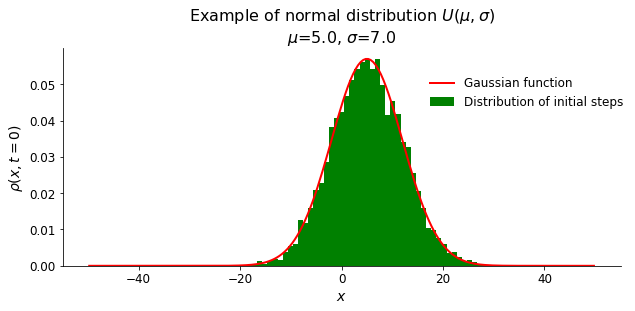

In [31]:
# generate a figure with a single subplot, of some size
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

Nbins=100
bins = np.linspace(Wall_lo, Wall_hi, num=Nbins)
# plot empirical estimation
ax.histxw_0,
    bins=bins,
    color="green",
    density=True, # Normalizes the histogram to total probabity == 1
    label="Distribution of initial steps"
);

# plot theoretical prediction
ax.plot( x_mesh, rho_0, ... )

# add labels for axes
...
# add legend
...
# add title
...

## Ensemble of random walks

To simulate the diffusion of perfume in the box, we need to adapt the `get_traj()` function from the previous excercise. The initial positions are now distributed across a continuum range of values ($x_i(t_e) \in [L_0,L_1]$), so the trajectories will be arrays of floats (the epoch index $t_e$ can continue to be a discrete integer). Moreover, the function requires an input $x_i$ for the initial position of the random walk--the walks are no longer starting from zero--and must ensure that each *trajectory reamains bounded*. Pass the positions of the external wall ($L_0$ and $L_1$) as input arguments.

In [19]:
#  Define the probability distribution to be implemented. Starting with the susual \ell = +1 or -1 with 
# equal probabilities can suffice. We will experiment changing this at the end...
def get_step():
    ...
    return ell

def get_traj(length=100, dim=2, x_initial=np.zeros(2,dtype=float),bound_lo=-50000.,bound_hi=5000.):
    """Generate a RW in d dimensions
    
    Parameters
    ----------
    length: int
        Length of the RW.
    dim: int
        Dimension of the RW
    x_initial:  np.array(ndim, dtype=float)
        Initial position for all the dnim  coordinates
    bound_lo, bound_hi: float
        Position of the external walls

    Returns
    -------
    traj : np.array, (length, dim)
        The positions of the RW.
    
    Notes
    -----
    At each time-step, the walker moves in only one direction.
    At each time-step, the walker moves by -\ell or +\ell (it can be \ell=+1/-1 or from X(\ell) )
    """
    
    ...

    return traj

While inplementing the walk evolution above, you need to assume a distribution $\mathcal{X}(\ell)$ from where each random step $\ell$ is drawn.
Compute the mean value $<\ell>$ and the standard deviation $a$ of this distribution.

In [20]:
X_norm = ...
X_ave  = ...
X_var  = ...
a = np.sqrt(X_var)
print("Norm = ",X_norm,"\n<\ell> = ",X_ave,"\n\sig^2 = ",X_var,"\na (=\sqrt{\sigma^2}) = ",a)

Norm =  1.0 
<\ell> =  0.0 
\sig^2 =  2.0 
a (=\sqrt{\sigma^2}) =  1.4142135623730951


#### Evolving the walks

Write a function that takes the initial positions `xw_0` and evolves each random walk for `Nepochs` steps. The output must be an array whose first index lists all the epochs and the second index is used to record the positions of every random walk at that particular epoch.

In [21]:
def Evolve_random_walks(xw_0_in,Nepochs_in):
    """Evolves a RW in 1 dimensions
    
    Parameters
    ----------
    xw_0_in: np.array(dtype=float)
        list of inititial conditions of all the walks.
    Nepochs_in: int
        number of RW steps

    Returns
    -------
    Walks : np.array, (Nepochs_in, len(xw_0_in))
        Array with all trajectories.
    """

    Nwalks=len(xw_0_in)
    Walks = ...

    return Walks

We can now perform the full evolution of the ensemble of walks:

In [32]:
Nepochs=201
Walks_distr = Evolve_random_walks(xw_0,Nepochs)

Plot the distribution at some fixed epochs to picture how the perfume molecules diffuse: 

In [33]:
# generate a figure with a single subplot, of some size
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

Epoch_list = [0, 10, 50, 200]
for n_epoch in Epoch_list:
    ax.hist(...);

# add labels for axes
...
# add legend
...
# add title
...

Text(0.5, 1.0, 'Diffuson of 1D random walks\nInitial distribution: $\\mu$=5.0, $\\sigma$=7.0')

## Diffusion equation in 1D

In the first lectures, we have consdered a random walk 

$$
x_{n+1} = x_n + \ell \, ,
$$

where $\ell$ is a random variable extracted from a distribution $\mathcal{X}(\ell)$ of *mean zero*.
To simulate the distribution obtained from evolving an ensemble of walks, we need to solve the diffusion equation in 1D:

$$
\frac{\partial \rho(x,t)}{\partial t} = D \frac{\partial^2 \rho(x,t)}{\partial x^2}
$$

with initial boundary condition $\rho(x,t=0) = \rho_0(x)$. The diffusion constant $D(a)$ is a function of the variance of the step distribution \[$a^2 = \int \ell^2 \mathcal{X}(\ell) d\ell$\].

### Integrating the diffusion equation

We discretize the $\rho^n_t = \rho(x_j,t_n)$ on uniform meshes for both $x$ and $t$. Using the finite difference approximation for the second derivative and the Euler method for the time evolution, we have:

$$
\rho^{n+1}_j = \rho^n_j + D \frac{\rho^n_{j-1} -2 \rho^n_j + \rho^n_{j+1}}{(\Delta x)^2} \delta t \, .
$$

This is a basic algorigthm refereed to as Forward Time, Centered Space (or FTCS). There are many other methods for solving the diffusion equation that can result more efficient. But this is already good enough for our purposes! There remain only two details that require attention:

1. **The time step**. It can be proved that the above equations can become unsatable if $\delta t > \frac{(\Delta x)^2}{2 D}$. So you should make attention not to use a too large time step in your simulation.

2. **Boundary conditions at the walls** need to be imposed so that no perfume molecule can exit the box. This requires that the flux of particles goes to zero at the walls: $J(L_0)=J(L_1)=0$.

From the current conservation relation, $\frac{\partial \rho}{\partial t} = -\frac{\partial J}{\partial x}$, we find that the flux is given by:

$$
J(x,t) = - D \frac{\partial \rho(x,t)}{\partial x}
$$
and therefore the second gradient of the density, computed with finite differences, can be written as

$$
D \frac{\partial^2 \rho_j(t)}{\partial x^2} = - \frac{J_{j+1/2}(t) -  J_{j-1/2}(t)}{\Delta x} \; ,
$$

where $J_{j+1/2} = - D \frac{\rho_{j+1}(t) - \rho_j(t)}{\Delta x}$ are the fluxes estimated at half position on each mesh step. Asuming a total of N mesh points ($\{x_j: j=0,\ldots, N-1\}$), the condition of no flux at the walls is $J_{-1/2}=J_{N-1/2}=0$ and must be implemented as follows:

$$
\frac{\partial^2 \rho^{n_t}_{j=0}}{\partial x^2}
= \frac{\rho^{n_t}_{j=1} -  \rho^{n_t}_{j=0}}{(\Delta x)^2}
$$
and
$$
\frac{\partial^2 \rho^{n_t}_{j=N-1}}{\partial x^2}
= \frac{\rho^{n_t}_{j=N-2} - \rho^{n_t}_{j=N-1}}{(\Delta x)^2} \; .
$$


**Question:** If the ensemble of random walks evolves for a discrete number $n_e$ of time epochs, what is the corresponding time for the evolution of the diffusion equation?  Does this depend on $D$? (motivate your answer).

Write a function that takes the arrays for the mesh and $\rho_0(x)$ as input and evolves the density of perfume for a given time $\Delta T$. The function will require the values of $D$ and the time step as input. 

**Hint**: Finite differences on a uniform mesh can be implemented implicitely. For example:
```python
d2rho[1:-1] = rho[:-2] - 2*rho[1:-1] + rho[2:]
```
Python vectoriszes these statements so that they run faster. Functions such ar `np.diff()`, `np.insert()` and `np.append()` can also be very useful for this purpose.

In [24]:
def DiffEq_evolve(rho, DeltaX, D, DTime):
    """Solves the diffusion equation in 1 dimension
    
    Parameters
    ----------
    rho: np.array(dtype=float)
        Values of the initial density distribution (on a uniform mesh).
    DeltaX: float
        x-mesh step
    D: float
        Diffusion constant
    DTime:  float
        Time of evolution

    Returns
    -------
    rho : np.array, float
        Final vfalues of the initial density distribution (at time T_0+DTime).
    """
    
    ...
    
    return


Now compare the results with the stocastic distributions of walks:

In [34]:
Time=0.0
DTime = ...
D = X_var / 2. # depends on the distribution X(\ell) as shown during lectures
rho = np.copy(rho_0)

fig, axx = plt.subplots(2, 2, figsize=(16, 10), tight_layout=True)
axx = axx.reshape(-1)

for n in range(4):
    for ip in range(4):  axx[ip].plot(x_mesh, rho, label=f"t = {Time}")
    DiffEq_evolve(rho,delta_x,D,DTime)
    Time += DTime

# plot simulation

Epoch_list = [0, 20, ..., ...]
for i in range(4):
    axx[i].hist( Walks_distr[Epoch_list[i],:],  bins=bins, ... );
    axx[i].legend(...)
    axx[i].set_title(...);

--------------------------

## Exercise

With the tools developed above, study some different cases by varying the initial conditions and the type of random walk. In partiular:

1. How does the perfume distribution evolves if it is initially concentrated nearby one wall?

2. What if there is an initial deep in the middle of the box \[something like $\rho_0(x)= \mathcal{N} \cos^2\left(\frac{x-L_0}{L_1-L_0}\right)$\]?

3. So far we have used a step distribution $\mathcal{X}(\ell)=\frac 1 2 \{\delta(\ell+1) + \delta(\ell-1)\}$. Try to cange it, the diffusion should become faster or slower depending on $a$.
